# **Stock Market Prediction using Machine Learning**

Submitted by,
- Yash Parmar   (24mcmi06)
- Adith Koliyot (24mcmi10)
- Amit Rai      (24mcmi12)

---


Step 1: Install necessary libraries

In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

Step 2: Download Microsoft (MSFT) stock data

In [31]:
data = yf.download('MSFT', start='2012-01-01', end='2025-12-31')
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2012-01-03,21.077831,21.227430,20.778631,20.904609,64731500
2012-01-04,21.573877,21.628993,21.085710,21.117204,80516100
2012-01-05,21.794338,21.833706,21.487265,21.558127,56081400
2012-01-06,22.132904,22.195893,21.676231,21.676231,99455500
2012-01-09,21.841581,22.125034,21.825834,22.085665,59706800
...,...,...,...,...,...
2025-04-21,359.119995,364.480011,355.670013,362.820007,20807300
2025-04-22,366.820007,367.769989,359.859985,363.380005,19485000


Step 3: Prepare the dataset for ANN

In [32]:
# We will predict Open, High, Low, Close based on previous 2 days
features = ['Open', 'High', 'Low', 'Close']

# Create lag features for previous 2 days
data['Open_1'] = data['Open'].shift(1)
data['High_1'] = data['High'].shift(1)
data['Low_1'] = data['Low'].shift(1)
data['Close_1'] = data['Close'].shift(1)

data['Open_2'] = data['Open'].shift(2)
data['High_2'] = data['High'].shift(2)
data['Low_2'] = data['Low'].shift(2)
data['Close_2'] = data['Close'].shift(2)

# Drop NaN rows
data_ann = data.dropna()

# Define X and y for ANN
X_ann = data_ann[['Open_1', 'High_1', 'Low_1', 'Close_1', 'Open_2', 'High_2', 'Low_2', 'Close_2']]
y_ann = data_ann[['Open', 'High', 'Low', 'Close']]

# Normalize features
scaler_X_ann = MinMaxScaler()
scaler_y_ann = MinMaxScaler()

X_ann_scaled = scaler_X_ann.fit_transform(X_ann)
y_ann_scaled = scaler_y_ann.fit_transform(y_ann)

# Split into train and test sets for ANN
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann_scaled, y_ann_scaled, test_size=0.2, shuffle=False)

Step 4: Build the ANN model

In [33]:
model_ann = Sequential()
model_ann.add(Dense(2, input_dim=8, activation='sigmoid'))  # Hidden layer 1
model_ann.add(Dense(2, activation='sigmoid'))                # Hidden layer 2
model_ann.add(Dense(4, activation='linear'))                 # Output layer

model_ann.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 5: Train and Evaluate the ANN model

In [35]:
model_ann.fit(X_train_ann, y_train_ann, epochs=10000, batch_size=32, verbose=0)

loss_ann = model_ann.evaluate(X_test_ann, y_test_ann)
print(f"\nTest Loss (MSE) - ANN: {loss_ann:.4f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7088e-04  

Test Loss (MSE) - ANN: 0.0006


Step 6: Make Predictions and Plot

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

📊 ANN Model Performance:
MSE: 116.6828
MAE: 8.3110
R² Score: 0.9771


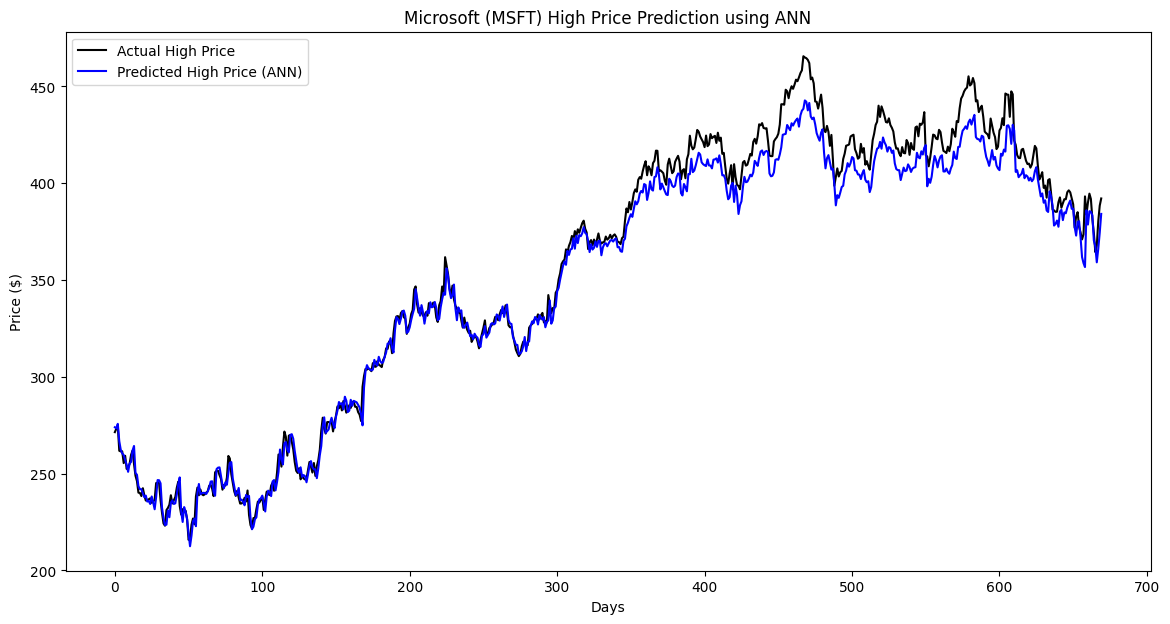

In [36]:
# ANN predictions
y_pred_ann_scaled = model_ann.predict(X_test_ann)
y_pred_ann = scaler_y_ann.inverse_transform(y_pred_ann_scaled)
y_true_ann = scaler_y_ann.inverse_transform(y_test_ann)

mse_ann = mean_squared_error(y_true_ann, y_pred_ann)
mae_ann = mean_absolute_error(y_true_ann, y_pred_ann)
r2_ann = r2_score(y_true_ann, y_pred_ann)

print("\n📊 ANN Model Performance:")
print(f"MSE: {mse_ann:.4f}")
print(f"MAE: {mae_ann:.4f}")
print(f"R² Score: {r2_ann:.4f}")

plt.figure(figsize=(14,7))
plt.plot(y_true_ann[:, 1], label='Actual High Price', color='black')
plt.plot(y_pred_ann[:, 1], label='Predicted High Price (ANN)', color='blue')
plt.title('Microsoft (MSFT) High Price Prediction using ANN')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [92]:
import datetime
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# How many future days to predict
# future_days = int(input("Enter the number of future days to predict: "))
future_days = 30

# Prepare the last 2 days' Open, High, Low, Close
last_two_days = data[['Open', 'High', 'Low', 'Close']].iloc[-2:]

# Flatten into a 1D array (8 features)
input_features = last_two_days.values.flatten()  # shape (8,)


# Placeholder to collect future predictions
future_predictions = []

for _ in range(future_days):
    # Reshape to (1, 8) for ANN model input
    input_reshaped = input_features.reshape(1, -1)

    # Predict next day (Open, High, Low, Close)
    next_pred = model_ann.predict(input_reshaped, verbose=0)

    # Store the predicted Close price
    future_predictions.append(next_pred[0])  # Example: taking predicted High price (index 1)

    # Update input_features for next prediction
    # Shift previous day data
    input_features = np.roll(input_features, -4)  # shift by 4 values (Open, High, Low, Close)
    input_features[-4:] = next_pred  # replace with new  Open, High, Low, Close


# After prediction loop:
future_predictions = np.array(future_predictions)  # shape = (future_days = 30, 4)

# Inverse transform
future_predictions_actual = scaler_y_ann.inverse_transform(future_predictions)

# Build Future Dates
last_date_in_dataset = data.index[-1]  # Last available date
future_dates = [last_date_in_dataset + datetime.timedelta(days=i) for i in range(1, future_days+1)]

# Create DataFrame
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted High Price': future_predictions_actual[:, 1]  # (or Predicted Close/High depending what you store)
})

# Display
print(future_df)



         Date  Predicted High Price
0  2025-04-26            564.591248
1  2025-04-27            564.591248
2  2025-04-28            491.225586
3  2025-04-29            492.843689
4  2025-04-30            454.999146
5  2025-05-01            457.114258
6  2025-05-02            432.242188
7  2025-05-03            434.567444
8  2025-05-04            416.216949
9  2025-05-05            418.648071
10 2025-05-06            404.141388
11 2025-05-07            406.633392
12 2025-05-08            394.622681
13 2025-05-09            397.154724
14 2025-05-10            386.873901
15 2025-05-11            389.436096
16 2025-05-12            380.411713
17 2025-05-13            382.999634
18 2025-05-14            374.920197
19 2025-05-15            377.532288
20 2025-05-16            370.182526
21 2025-05-17            372.818970
22 2025-05-18            366.044586
23 2025-05-19            368.706390
24 2025-05-20            362.393005
25 2025-05-21            365.081879
26 2025-05-22            359

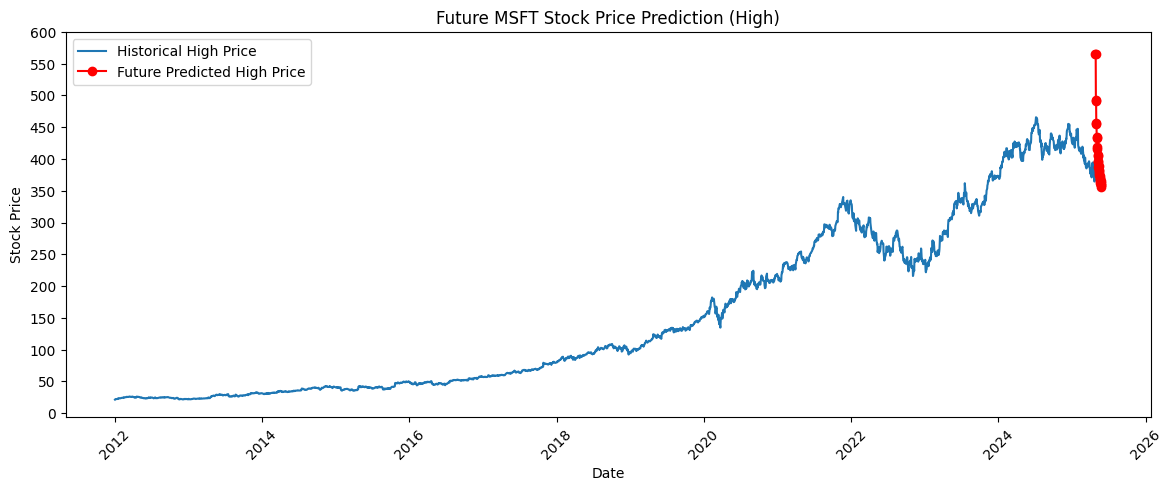

In [93]:
# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(data.index, data['High'], label='Historical High Price')  # You can also plot Close here
plt.plot(future_df['Date'], future_df['Predicted High Price'], color='red', marker='o', label='Future Predicted High Price')
plt.title('Future MSFT Stock Price Prediction (High)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, future_df['Predicted High Price'].max() + 50, 50))
plt.legend()
plt.show()

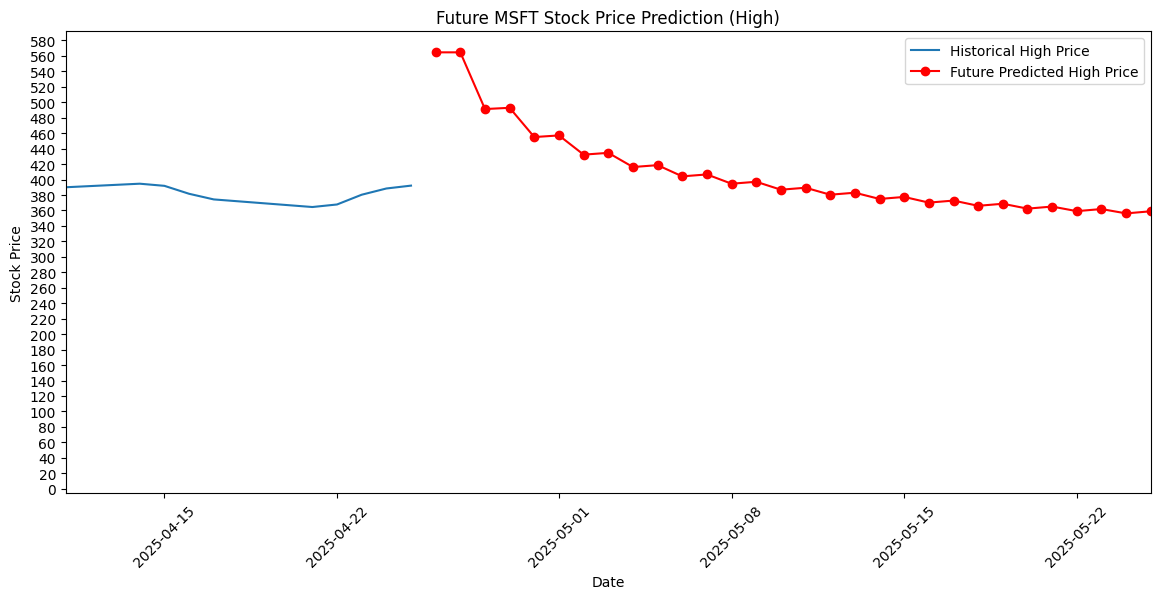

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Plot historical data
plt.plot(data.index, data['High'], label='Historical High Price')

# Plot future predictions
plt.plot(future_df['Date'], future_df['Predicted High Price'], color='red', marker='o', label='Future Predicted High Price')

plt.title('Future MSFT Stock Price Prediction (High)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, future_df['Predicted High Price'].max() + 20, 20))
plt.legend()

# ✅ Focus (Zoom) on last 100 days + future
plt.xlim([data.index[-10], future_df['Date'].iloc[-1]])

plt.show()


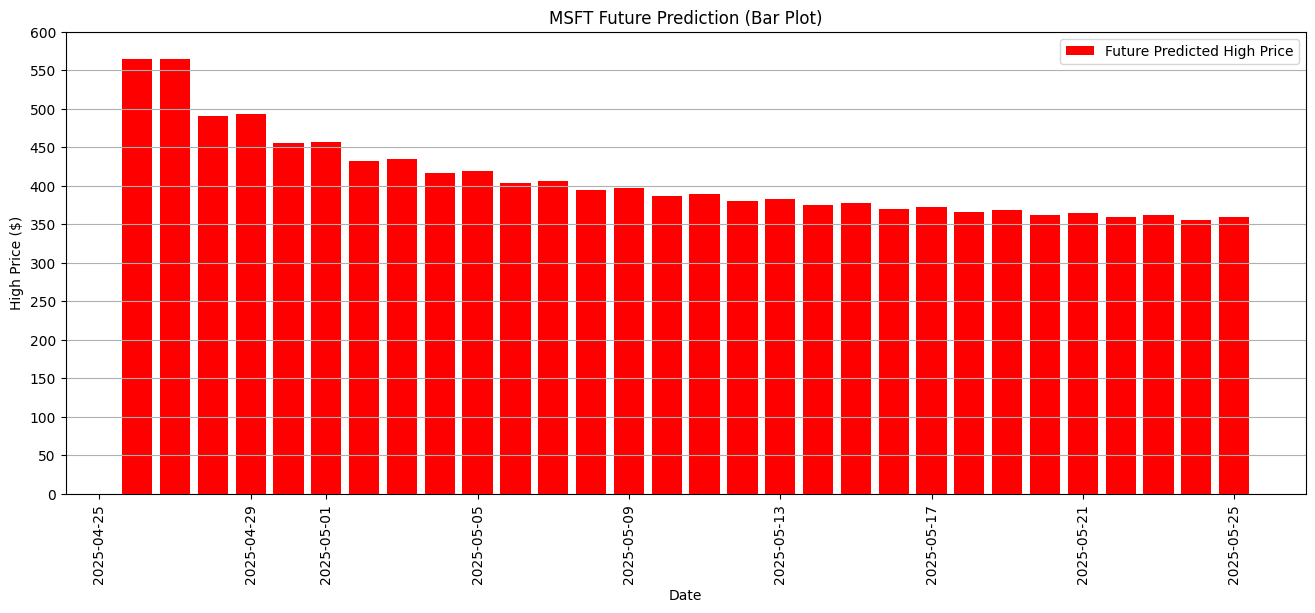

In [95]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16,6))

future_dates = future_df['Date'].values
future_prices = future_df['Predicted High Price'].values

# ✅ Plot Future Bars
plt.bar(future_dates, future_prices, color='red', label='Future Predicted High Price')

# Titles and Labels
plt.title('MSFT Future Prediction (Bar Plot)')
plt.xlabel('Date')
plt.ylabel('High Price ($)')
plt.xticks(rotation=90)

# ✅ Control Y-axis ticks
plt.yticks(np.arange(0, future_df['Predicted High Price'].max() + 50, 50))

plt.grid(axis='y')
plt.legend()
plt.show()
